In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import time
import xlrd
import tensorflow as tf
from IPython import display
%matplotlib inline

In [2]:
X_input = np.linspace(-1 , 1 , 100)
Y_input = X_input * 3 + np.random.randn(X_input.shape[0])*0.5

In [3]:
n_samples = X_input.shape[0]
x = tf.placeholder(tf.float32, name="X")
y = tf.placeholder(tf.float32, name="Y")
w = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")
y_predicted = x * w + b
cost = tf.reduce_sum(tf.pow(y_predicted-y, 2))/(2*n_samples)
loss = tf.square(y - y_predicted, name = "loss")
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(loss)

Optimization Finished!
('Training cost=', 0.14090809, 'W=', 3.0475175, 'b=', -0.0038836284, '\n')


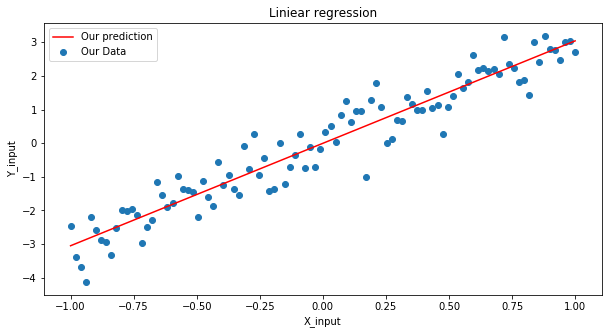

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        sess.run(optimizer, feed_dict = {x:X_input, y:Y_input})
    w_value, b_value = sess.run([w, b])
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={x: X_input, y: Y_input})
    print("Training cost=", training_cost, "W=", sess.run(w), "b=", sess.run(b), '\n')
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title('Liniear regression')
    ax.scatter(x=X_input,y=Y_input,label='Our Data')
    plt.plot(X_input, w_value*X_input + b_value,color='red',label='Our prediction')
    ax.set_xlabel('X_input')
    ax.set_ylabel('Y_input')
    ax.legend(loc='best')
    plt.show()